# Laboratorio 4 realizado por: Johan Camilo Suarez Sinisterra y Kalia Angelica Gonzalez Jimenez

## Ejercicio 1 

A continuacion , se quiere realizar el siguiente ejericio usando proramacion lineal con el metodo Simplex estandarizado: $$\text{max}(3x1+2x2+5x3)$$ y donde esta sujeto a las siguientes instrucciones: $$\text(x1+x2+x3\leq 100)$$ $$\text(2x1+x2+x3 \leq 150)$$ $$\text(x1+4x2+2x3 \leq 80)$$  $$\text(x1,x2,x3 \geq 0)$$


##### Explicacion de Implementacion

1. Agregamos las variables de holgura s1,s2 y s3 e igualamos las ecuaciones. 
2. Iteramos con base a la formula matematica $$\text (cj = cj-\lambda Aj)$$ done cj representa la matriz de coeficientes de cada ecuacion incluyendo el de las variables. 
3. Iteramos hasta encontrar el optimo

In [10]:
import numpy as np 

#Definimos una lista donde estaran los coeficientes de cada una de las variables incluyendo las de holgura 
coeficiente =np.array([-3,-2,-5,0,0,0])# Ponemos las variables de holgura como 0 y las variables de decision como los coeficientes de la funcion objetivo en negativo 
# Definimos la matriz de restricciones 
restricciones = np.array([[1,1,1,1,0,0],[2,1,1,0,1,0],[1,4,2,0,0,1]]) 
# Definimos el vector de resultados 
resultados = np.array([100,150,80]) 
#Definimos las variables de holgura como base (columna 3,4,5)
variables_base = np.array([3,4,5]) 
#Realizamos el algoritmo 
def simplexAlgorithm(coeficientes,restricciones,resultados): 
    m,n = restricciones.shape  
    # Definimos la matriz de coeficientes
    b = restricciones[:, variables_base] 
    #Lista de los indices de las variables no basicas 
    non_basic = [j for j in range(n) if j not in variables_base]
    # Definimos la matriz de soluciones 
    while True: 
        b_invertida = np.linalg.inv(b) 
        x_b = (b_invertida @ resultados ).flatten()
        lambda_ = coeficientes[variables_base] @ b_invertida 
        #Calculamos el costo reducido 
        costo_reducido = coeficientes[non_basic] - lambda_ @ restricciones[:, non_basic] 
        # Verificamos si el costo reducido es positivo 
        if all(costo_reducido >= 0): 
            x = np.zeros(n) 
            for i , var_index in enumerate(variables_base): 
                x[var_index] =float(x_b[i] )
            z = -coeficientes @ x 
            return x, z 
        # Encontramos la variable entrante 
        entrante = non_basic[np.argmin(costo_reducido)] 
        d = b_invertida @ restricciones[:, entrante] 
        ratios = x_b / d 
        #Determinamos cual varibale basica va a salir de la base
        fuera_indice = np.argmin(ratios) 
        fuera = variables_base[fuera_indice] 
        # Actualizamos la base 
        variables_base[fuera_indice] = entrante 
        b = restricciones[:, variables_base] 
        non_basic = [ j for j in range(n) if j not in variables_base] 
#Ejecutamos el algoritmo 
solucion , z = simplexAlgorithm(coeficiente, restricciones, resultados) 
print("La solucion es: ",solucion) 
print("El valor de la funcion objetivo es: ",z)
        

La solucion es:  [73.33333333  0.          3.33333333 23.33333333  0.          0.        ]
El valor de la funcion objetivo es:  236.66666666666666


#### Tablas de iteraciones

A continuacion se muestran las tablas de cada iteracion: 

| Basica | x1 | x2 | x3 | s1 | s2 | s3 | RHS | 
|--------|----|----|----|----|----|----|-----| 
| s1     | 1  | 1  | 1  | 1  | 0  | 0  | 100 | 
| s2     | 2  | 1  | 1  | 0  | 1  | 0  | 150 | 
| s3     | 1  | 4  | 2  | 0  | 0  | 1  | 80  |  
| zj-cj     | -3  | -2  | -5  | 0  | 0  | 0  |  | 




Ahora buscamos la proxima variable a introducir en la base. En este caso es -5 en la columna 3.  Dividimos cada termino de dicha columna con el resultado (RHS) : $$\text(100/1 = 150)$$ $$\text(150/1 = 150)$$ $$\text(80/2 = 40)$$

| Basica | x1 | x2 | x3 | s1 | s2 | s3 | RHS | 
|--------|----|----|----|----|----|----|-----| 
| s1     | 0.5  | -1  | 0 | 1  | 0  | 0  | 60 | 
| s2     | 1.5  | -1  | 0  | 0  | 1  | 0  | 110 | 
| s3     | 0.5  | 2  | 1 | 0  | 0  | 0.5  | 40  |  
| zj-cj     | -0.5  | 8  | 0  | 0  | 0  | 0  |  | 

Realizamos la ultima iteracion dividiendo los resultados con los valores en la columna 2 (x1) :  $$\text(60/0.5 = 120)$$ $$\text(110/1.5= 73,33)$$ $$\text(40/0.5 = 80)$$

| Basica | x1 | x2 | x3 | s1 | s2 | s3 | RHS | 
|--------|----|----|----|----|----|----|-----| 
| s1     | 0  | -0.67  | 0 | 1  | -0.33  | -0.33  | 23.33 | 
| s2     | 1 | -0.67 | 0  | 0  | -0.67  | -0.33  | 73.33 | 
| s3     | 0  | 2.33  | 1 | 0  | -0.33  | 0.67  | 3.33  |  
| zj-cj     | -0 | 7.67  | 0  | 0  | -0.33  | 2.33  |  | 

#### Analisis Geometrico: 

Este tipo de problema define una region que esta acostada por planos correspondientes a cada restriccion. Cada una de ellas delimita una parte del espacio. Esto confirma que el optimo se alcanza en la interseccion de las dos restricciones activas (mas limitantes). HACER GRAFICASSSSSS

La solucion es:  [73.33333333  0.          3.33333333 23.33333333  0.          0.        ]
El valor de la funcion objetivo es:  236.66666666666666


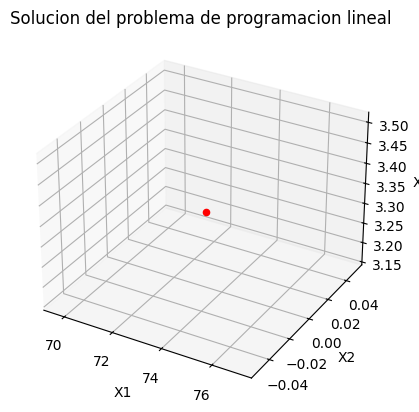

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
#Definimos una lista donde estaran los coeficientes de cada una de las variables incluyendo las de holgura 
coeficiente =np.array([-3,-2,-5,0,0,0])# Ponemos las variables de holgura como 0 y las variables de decision como los coeficientes de la funcion objetivo en negativo 
# Definimos la matriz de restricciones 
restricciones = np.array([[1,1,1,1,0,0],[2,1,1,0,1,0],[1,4,2,0,0,1]]) 
# Definimos el vector de resultados 
resultados = np.array([100,150,80]) 
#Definimos las variables de holgura como base (columna 3,4,5)
variables_base = np.array([3,4,5]) 
#Realizamos el algoritmo 
def simplexAlgorithm(coeficientes,restricciones,resultados): 
    m,n = restricciones.shape  
    # Definimos la matriz de coeficientes
    b = restricciones[:, variables_base] 
    #Lista de los indices de las variables no basicas 
    non_basic = [j for j in range(n) if j not in variables_base]
    # Definimos la matriz de soluciones 
    while True: 
        b_invertida = np.linalg.inv(b) 
        x_b = (b_invertida @ resultados ).flatten()
        lambda_ = coeficientes[variables_base] @ b_invertida 
        #Calculamos el costo reducido 
        costo_reducido = coeficientes[non_basic] - lambda_ @ restricciones[:, non_basic] 
        # Verificamos si el costo reducido es positivo 
        if all(costo_reducido >= 0): 
            x = np.zeros(n) 
            for i , var_index in enumerate(variables_base): 
                x[var_index] =float(x_b[i] )
            z = -coeficientes @ x 
            return x, z 
        # Encontramos la variable entrante 
        entrante = non_basic[np.argmin(costo_reducido)] 
        d = b_invertida @ restricciones[:, entrante] 
        ratios = x_b / d 
        #Determinamos cual varibale basica va a salir de la base
        fuera_indice = np.argmin(ratios) 
        fuera = variables_base[fuera_indice] 
        # Actualizamos la base 
        variables_base[fuera_indice] = entrante 
        b = restricciones[:, variables_base] 
        non_basic = [ j for j in range(n) if j not in variables_base] 
#Ejecutamos el algoritmo 
solucion , z = simplexAlgorithm(coeficiente, restricciones, resultados) 
print("La solucion es: ",solucion) 
print("El valor de la funcion objetivo es: ",z) 
#Extraemos las variables de decision 
x1,x2,x3 = solucion[:3] 
#Graficamos la solucion  
figura = plt.figure()
ax = figura.add_subplot(111, projection='3d') 
ax.scatter(x1,x2,x3, c='r', marker='o') 
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3') 
ax.set_title('Solucion del problema de programacion lineal')
plt.show()



        

#### Analisis de Sensibilidad : 

In [11]:
import numpy as np 

#Definimos una lista donde estaran los coeficientes de cada una de las variables incluyendo las de holgura 
coeficiente =np.array([-3,-2,-5,2.33,0,0])# Ponemos las variables de holgura como 0 y las variables de decision como los coeficientes de la funcion objetivo en negativo 
# Definimos la matriz de restricciones 
restricciones = np.array([[1,1,1,1,0,0],[2,1,1,0,1,0],[1,4,2,0,0,1]]) 
# Definimos el vector de resultados 
resultados = np.array([100,150,80]) 
#Definimos las variables de holgura como base (columna 3,4,5)
variables_base = np.array([3,4,5]) 
#Realizamos el algoritmo 
def simplexAlgorithm(coeficientes,restricciones,resultados): 
    m,n = restricciones.shape  
    # Definimos la matriz de coeficientes
    b = restricciones[:, variables_base] 
    #Lista de los indices de las variables no basicas 
    non_basic = [j for j in range(n) if j not in variables_base]
    # Definimos la matriz de soluciones 
    while True: 
        b_invertida = np.linalg.inv(b) 
        x_b = (b_invertida @ resultados ).flatten()
        lambda_ = coeficientes[variables_base] @ b_invertida 
        #Calculamos el costo reducido 
        costo_reducido = coeficientes[non_basic] - lambda_ @ restricciones[:, non_basic] 
        # Verificamos si el costo reducido es positivo 
        if all(costo_reducido >= 0): 
            x = np.zeros(n) 
            for i , var_index in enumerate(variables_base): 
                x[var_index] =float(x_b[i] )
            z = -coeficientes @ x 
            return x, z 
        # Encontramos la variable entrante 
        entrante = non_basic[np.argmin(costo_reducido)] 
        d = b_invertida @ restricciones[:, entrante] 
        ratios = x_b / d 
        #Determinamos cual varibale basica va a salir de la base
        fuera_indice = np.argmin(ratios) 
        fuera = variables_base[fuera_indice] 
        # Actualizamos la base 
        variables_base[fuera_indice] = entrante 
        b = restricciones[:, variables_base] 
        non_basic = [ j for j in range(n) if j not in variables_base] 
#Ejecutamos el algoritmo 
solucion , z = simplexAlgorithm(coeficiente, restricciones, resultados) 
print("La solucion es: ",solucion) 
print("El valor de la funcion objetivo es: ",z)
        

La solucion es:  [73.33333333  0.          3.33333333 23.33333333  0.          0.        ]
El valor de la funcion objetivo es:  182.29999999999998


En este caso, vemos que al cambiar los valores de algunos de las variables de holgura , el resultado cambia drasticamente y resulta ser menor al que es originalmente. Esto tal vez se deba por la nueva asignacion de pibotes durante el calculo de las variables que hagan parte o no de la matriz.

In [13]:
import numpy as np 

#Definimos una lista donde estaran los coeficientes de cada una de las variables incluyendo las de holgura 
coeficiente =np.array([-3,12,-5,0,0,0])# Ponemos las variables de holgura como 0 y las variables de decision como los coeficientes de la funcion objetivo en negativo 
# Definimos la matriz de restricciones 
restricciones = np.array([[1,1,1,1,0,0],[2,1,1,0,1,0],[1,4,2,0,0,1]]) 
# Definimos el vector de resultados 
resultados = np.array([100,150,80]) 
#Definimos las variables de holgura como base (columna 3,4,5)
variables_base = np.array([3,4,5]) 
#Realizamos el algoritmo 
def simplexAlgorithm(coeficientes,restricciones,resultados): 
    m,n = restricciones.shape  
    # Definimos la matriz de coeficientes
    b = restricciones[:, variables_base] 
    #Lista de los indices de las variables no basicas 
    non_basic = [j for j in range(n) if j not in variables_base]
    # Definimos la matriz de soluciones 
    while True: 
        b_invertida = np.linalg.inv(b) 
        x_b = (b_invertida @ resultados ).flatten()
        lambda_ = coeficientes[variables_base] @ b_invertida 
        #Calculamos el costo reducido 
        costo_reducido = coeficientes[non_basic] - lambda_ @ restricciones[:, non_basic] 
        # Verificamos si el costo reducido es positivo 
        if all(costo_reducido >= 0): 
            x = np.zeros(n) 
            for i , var_index in enumerate(variables_base): 
                x[var_index] =float(x_b[i] )
            z = -coeficientes @ x 
            return x, z 
        # Encontramos la variable entrante 
        entrante = non_basic[np.argmin(costo_reducido)] 
        d = b_invertida @ restricciones[:, entrante] 
        ratios = x_b / d 
        #Determinamos cual varibale basica va a salir de la base
        fuera_indice = np.argmin(ratios) 
        fuera = variables_base[fuera_indice] 
        # Actualizamos la base 
        variables_base[fuera_indice] = entrante 
        b = restricciones[:, variables_base] 
        non_basic = [ j for j in range(n) if j not in variables_base] 
#Ejecutamos el algoritmo 
solucion , z = simplexAlgorithm(coeficiente, restricciones, resultados) 
print("La solucion es: ",solucion) 
print("El valor de la funcion objetivo es: ",z)
        

La solucion es:  [73.33333333  0.          3.33333333 23.33333333  0.          0.        ]
El valor de la funcion objetivo es:  236.66666666666666


Sin embargo, en este otro caso a pesar de haber cambiado el valor de la variable objetivo, nos da el mismo resultado. Convirtiendo asi la solucion estable ante distintos cambios.

## Ejercicio 2

#### Descripción del Problema

Para este problema, utilizaremos el método Simplex de Dos Fases para resolver un problema de programación lineal con restricciones mixtas.

El problema que resolveremos es el siguiente:

$$
\begin{align*}
\text{Minimizar } & Z = 5x_1 - 4x_2 + 3x_3 \\
\text{sujeto a } & 2x_1 + x_2 - x_3 = 10 \\
& x_1 - 3x_2 + 2x_3 \geq 5 \\
& x_1 + x_2 + x_3 \leq 15 \\
& x_1, x_2, x_3 \geq 0
\end{align*}
$$

#### Preparación Fase I

En esta parte:
1. Transformamos el problema original para que todas las restricciones tengan el formato adecuado
2. Añadimos las variables de holgura, exceso y artificiales según corresponda
3. Creamos la función objetivo auxiliar que minimiza la suma de variables artificiales

Para nuestro problema:
- Para la primera restricción (=), añadimos una variable artificial
- Para la segunda restricción (≥), añadimos una variable de exceso y una artificial
- Para la tercera restricción (≤), añadimos una variable de holgura

La tabla inicial para Fase I será la siguiente:

| Base | x₁  | x₂  | x₃  | s₁  | e₁  | a₁  | a₂  | LD  |
|------|-----|-----|-----|-----|-----|-----|-----|-----|
| Z    | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   |
| a₁   | 2   | 1   | -1  | 0   | 0   | 1   | 0   | 10  |
| a₂   | 1   | -3  | 2   | 0   | -1  | 0   | 1   | 5   |
| s₁   | 1   | 1   | 1   | 1   | 0   | 0   | 0   | 15  |

Donde:
- s₁: variable de holgura para la restricción 3
- e₁: variable de exceso para la restricción 2
- a₁, a₂: variables artificiales para las restricciones 1 y 2

#### Preparación Fase II

Una vez encontrada una SBF:
1. Eliminamos las columnas correspondientes a las variables artificiales
2. Reintroducimos la función objetivo original
3. Realizamos operaciones para que los costos reducidos de las variables básicas sean cero


Entonces ahora si, implementamos nuestra solucion:

In [2]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

class SimplexDosFases:
    def __init__(self, c, A, b, signos_restricciones):
        """
        Inicializa el solucionador Simplex de Dos Fases
        c: coeficientes de la función objetivo (minimizar)
        A: matriz de coeficientes de restricciones
        b: vector de términos independientes
        signos_restricciones: lista con los signos de las restricciones ('<=', '=', '>=')
        """
        self.c_original = np.array(c, dtype=float)
        self.A_original = np.array(A, dtype=float)
        self.b_original = np.array(b, dtype=float)
        self.signos = signos_restricciones
        self.m, self.n = self.A_original.shape
        
        # Variables para seguimiento
        self.A = None
        self.b = None
        self.c = None
        self.tabla = None
        self.variables_basicas = None
        self.num_vars_originales = self.n
        self.indices_vars_artificiales = []
        self.indices_vars_holgura = []
        self.indices_vars_exceso = []
        
    def preparar_fase1(self):
        """Prepara el problema para la Fase I del método Simplex de Dos Fases"""
        print("\n--- PREPARACIÓN FASE I ---")
        
        # Copiar datos originales
        A = self.A_original.copy()
        b = self.b_original.copy()
        
        # Asegurar que b sea no negativo
        for i in range(len(b)):
            if b[i] < 0:
                b[i] = -b[i]
                A[i] = -A[i]
                if self.signos[i] == '<=':
                    self.signos[i] = '>='
                elif self.signos[i] == '>=':
                    self.signos[i] = '<='
        
        # Contar variables adicionales necesarias
        num_holgura = sum(1 for signo in self.signos if signo == '<=')
        num_exceso = sum(1 for signo in self.signos if signo == '>=')
        num_artificial = sum(1 for signo in self.signos if signo in ['=', '>='])
        
        # Extender la matriz A para las variables adicionales
        A_extendida = np.zeros((self.m, self.n + num_holgura + num_exceso + num_artificial))
        A_extendida[:, :self.n] = A
        
        # Añadir variables de holgura, exceso y artificiales
        col_actual = self.n
        for i, signo in enumerate(self.signos):
            if signo == '<=':  # Añadir variable de holgura
                A_extendida[i, col_actual] = 1
                self.indices_vars_holgura.append(col_actual)
                col_actual += 1
            elif signo == '>=':  # Añadir variable de exceso y artificial
                A_extendida[i, col_actual] = -1  # Variable de exceso
                self.indices_vars_exceso.append(col_actual)
                col_actual += 1
                A_extendida[i, col_actual] = 1   # Variable artificial
                self.indices_vars_artificiales.append(col_actual)
                col_actual += 1
            elif signo == '=':  # Añadir variable artificial
                A_extendida[i, col_actual] = 1
                self.indices_vars_artificiales.append(col_actual)
                col_actual += 1
        
        # Crear función objetivo para Fase I: minimizar suma de variables artificiales
        c_fase1 = np.zeros(A_extendida.shape[1])
        for idx in self.indices_vars_artificiales:
            c_fase1[idx] = 1
        
        # Crear tabla inicial
        self.tabla = np.zeros((self.m + 1, A_extendida.shape[1] + 1))
        self.tabla[0, :-1] = c_fase1
        self.tabla[1:, :-1] = A_extendida
        self.tabla[1:, -1] = b
        
        # Establecer variables básicas iniciales
        self.variables_basicas = [-1] * self.m
        for i in range(self.m):
            if self.signos[i] == '<=':
                self.variables_basicas[i] = self.indices_vars_holgura[self.signos[:i].count('<=')]
            elif self.signos[i] == '>=':
                self.variables_basicas[i] = self.indices_vars_artificiales[self.indices_vars_artificiales.index(
                    next(idx for idx in self.indices_vars_artificiales if A_extendida[i, idx] == 1))]
            elif self.signos[i] == '=':
                self.variables_basicas[i] = self.indices_vars_artificiales[self.indices_vars_artificiales.index(
                    next(idx for idx in self.indices_vars_artificiales if A_extendida[i, idx] == 1))]
        
        # Hacer ceros en la fila objetivo para variables básicas artificiales
        self._ajustar_fila_objetivo_fase1()
        
        print("Tabla inicial para Fase I:")
        self._imprimir_tabla()
        print(f"Variables básicas (índices): {self.variables_basicas}")
        return True
        
    def _ajustar_fila_objetivo_fase1(self):
        """Ajusta la fila objetivo para que tenga ceros en las columnas de variables básicas artificiales"""
        for i, var_basica in enumerate(self.variables_basicas):
            if var_basica in self.indices_vars_artificiales:
                self.tabla[0] -= self.tabla[0, var_basica] * self.tabla[i+1]
    
    def resolver_fase1(self):
        """Resuelve la Fase I del método Simplex de Dos Fases"""
        print("\n--- FASE I: ENCONTRAR SOLUCIÓN BÁSICA FACTIBLE ---")
        
        iteracion = 0
        while True:
            iteracion += 1
            print(f"\nIteración {iteracion} de Fase I:")
            
            # Verificar si hay coeficientes negativos en la fila objetivo
            costos_reducidos = self.tabla[0, :-1]
            if np.all(costos_reducidos >= -1e-10):
                print("Se alcanzó la solución óptima para Fase I")
                break
                
            # Seleccionar variable entrante (columna pivote)
            col_pivote = np.argmin(costos_reducidos)
            print(f"Variable entrante (índice): {col_pivote}")
            
            # Calcular razones y seleccionar variable saliente (fila pivote)
            razones = []
            for i in range(1, self.m + 1):
                if self.tabla[i, col_pivote] > 1e-10:
                    razones.append((self.tabla[i, -1] / self.tabla[i, col_pivote], i))
            
            if not razones:
                print("El problema es ilimitado")
                return False
                
            # Seleccionar la fila con la razón mínima
            _, fila_pivote = min(razones)
            var_saliente = self.variables_basicas[fila_pivote - 1]
            print(f"Variable saliente (índice): {var_saliente} (Fila {fila_pivote})")
            
            # Actualizar variables básicas
            self.variables_basicas[fila_pivote - 1] = col_pivote
            
            # Realizar operación de pivoteo
            self._operacion_pivote(fila_pivote, col_pivote)
            
            print("Tabla después de pivote:")
            self._imprimir_tabla()
            print(f"Variables básicas (índices): {self.variables_basicas}")
        
        # Verificar factibilidad
        if abs(self.tabla[0, -1]) > 1e-10:
            print(f"El problema original no tiene solución factible (valor objetivo = {self.tabla[0, -1]})")
            return False
            
        print("Se encontró una solución básica factible para el problema original")
        return True
    
    def preparar_fase2(self):
        """Prepara el problema para la Fase II del método Simplex de Dos Fases"""
        print("\n--- PREPARACIÓN FASE II ---")
        
        # Eliminar columnas de variables artificiales (crear nueva tabla)
        indices_a_mantener = [i for i in range(self.tabla.shape[1]-1) if i not in self.indices_vars_artificiales] + [-1]
        nueva_tabla = self.tabla[:, indices_a_mantener]
        
        # Restaurar función objetivo original
        c_original_extendido = np.zeros(nueva_tabla.shape[1] - 1)
        c_original_extendido[:self.num_vars_originales] = self.c_original
        
        # Colocar función objetivo en la tabla
        nueva_tabla[0, :-1] = c_original_extendido
        
        # Aplicar operaciones para tener ceros en la fila de costos para las variables básicas
        for i, var_basica in enumerate(self.variables_basicas):
            if var_basica not in self.indices_vars_artificiales and var_basica < nueva_tabla.shape[1] - 1:
                # Ajustar índice si se eliminaron columnas antes de esta variable
                nuevo_indice = var_basica - sum(1 for x in self.indices_vars_artificiales if x < var_basica)
                if nuevo_indice >= 0 and nueva_tabla[0, nuevo_indice] != 0:
                    nueva_tabla[0] -= nueva_tabla[0, nuevo_indice] * nueva_tabla[i+1]
        
        # Actualizar índices de variables básicas
        nuevos_indices_basicos = []
        for var in self.variables_basicas:
            if var not in self.indices_vars_artificiales:
                nuevo_indice = var - sum(1 for x in self.indices_vars_artificiales if x < var)
                nuevos_indices_basicos.append(nuevo_indice)
            else:
                # Esto no debería ocurrir si la Fase I encontró una SBF válida
                raise ValueError("Variable artificial en la base después de Fase I")
        
        self.variables_basicas = nuevos_indices_basicos
        self.tabla = nueva_tabla
        
        print("Tabla inicial para Fase II:")
        self._imprimir_tabla()
        print(f"Variables básicas (índices): {self.variables_basicas}")
        return True
    
    def resolver_fase2(self):
        """Resuelve la Fase II del método Simplex de Dos Fases"""
        print("\n--- FASE II: OPTIMIZACIÓN ---")
        
        iteracion = 0
        while True:
            iteracion += 1
            print(f"\nIteración {iteracion} de Fase II:")
            
            # Verificar si hay coeficientes negativos en la fila objetivo
            costos_reducidos = self.tabla[0, :-1]
            if np.all(costos_reducidos >= -1e-10):
                print("Se alcanzó la solución óptima")
                break
                
            # Seleccionar variable entrante (columna pivote)
            col_pivote = np.argmin(costos_reducidos)
            print(f"Variable entrante (índice): {col_pivote}")
            
            # Calcular razones y seleccionar variable saliente (fila pivote)
            razones = []
            for i in range(1, self.m + 1):
                if self.tabla[i, col_pivote] > 1e-10:
                    razones.append((self.tabla[i, -1] / self.tabla[i, col_pivote], i))
            
            if not razones:
                print("El problema es ilimitado")
                return False
                
            # Seleccionar la fila con la razón mínima
            _, fila_pivote = min(razones)
            var_saliente = self.variables_basicas[fila_pivote - 1]
            print(f"Variable saliente (índice): {var_saliente} (Fila {fila_pivote})")
            
            # Actualizar variables básicas
            self.variables_basicas[fila_pivote - 1] = col_pivote
            
            # Realizar operación de pivoteo
            self._operacion_pivote(fila_pivote, col_pivote)
            
            print("Tabla después de pivote:")
            self._imprimir_tabla()
            print(f"Variables básicas (índices): {self.variables_basicas}")
        
        return True
    
    def _operacion_pivote(self, fila_pivote, col_pivote):
        """Realiza la operación de pivoteo en la tabla"""
        # Normalizar fila pivote
        pivote = self.tabla[fila_pivote, col_pivote]
        self.tabla[fila_pivote] /= pivote
        
        # Actualizar demás filas
        for i in range(self.tabla.shape[0]):
            if i != fila_pivote:
                factor = self.tabla[i, col_pivote]
                self.tabla[i] -= factor * self.tabla[fila_pivote]
    
    def _imprimir_tabla(self):
        """Imprime la tabla actual en formato legible"""
        # Convertir la tabla a un formato más legible
        tabla_formateada = np.array2string(self.tabla, precision=4, suppress_small=True)
        print(tabla_formateada)
    
    def obtener_solucion(self):
        """Extrae la solución a partir de la tabla final"""
        # Inicializar vector solución con ceros
        x = np.zeros(self.num_vars_originales)
        
        # Colocar valores de variables básicas
        for i, var_basica in enumerate(self.variables_basicas):
            if var_basica < self.num_vars_originales:
                x[var_basica] = self.tabla[i+1, -1]
        
        # Valor de la función objetivo (negativo porque minimizamos)
        z = -self.tabla[0, -1]
        
        return x, z
    
    def resolver(self):
        """Resuelve el problema utilizando el método Simplex de Dos Fases"""
        # Fase I: Encontrar solución básica factible inicial
        self.preparar_fase1()
        if not self.resolver_fase1():
            return None, None
        
        # Fase II: Optimizar con la función objetivo original
        self.preparar_fase2()
        if not self.resolver_fase2():
            return None, None
        
        # Extraer solución
        return self.obtener_solucion()

# Definición del problema
c = np.array([5, -4, 3])  # Coeficientes de la función objetivo
A = np.array([
    [2, 1, -1],  # Restricción 1: 2x₁ + x₂ - x₃ = 10
    [1, -3, 2],  # Restricción 2: x₁ - 3x₂ + 2x₃ ≥ 5
    [1, 1, 1]    # Restricción 3: x₁ + x₂ + x₃ ≤ 15
])
b = np.array([10, 5, 15])  # Lados derechos de las restricciones
signos = ['=', '>=', '<=']  # Tipos de restricciones

# Resolver el problema
simplex = SimplexDosFases(c, A, b, signos)
solucion, valor_objetivo = simplex.resolver()

# Mostrar resultados
if solucion is not None:
    print("\n--- SOLUCIÓN ÓPTIMA ---")
    for i, val in enumerate(solucion):
        print(f"x{i+1} = {val:.1f}")
    print(f"Valor de la función objetivo: Z = {valor_objetivo:.1f}")
else:
    print("\nEl problema no tiene solución.")


--- PREPARACIÓN FASE I ---
Tabla inicial para Fase I:
[[ -3.   2.  -1.   0.   1.   0.   0. -15.]
 [  2.   1.  -1.   1.   0.   0.   0.  10.]
 [  1.  -3.   2.   0.  -1.   1.   0.   5.]
 [  1.   1.   1.   0.   0.   0.   1.  15.]]
Variables básicas (índices): [3, 5, 6]

--- FASE I: ENCONTRAR SOLUCIÓN BÁSICA FACTIBLE ---

Iteración 1 de Fase I:
Variable entrante (índice): 0
Variable saliente (índice): 3 (Fila 1)
Tabla después de pivote:
[[ 0.   3.5 -2.5  1.5  1.   0.   0.   0. ]
 [ 1.   0.5 -0.5  0.5  0.   0.   0.   5. ]
 [ 0.  -3.5  2.5 -0.5 -1.   1.   0.   0. ]
 [ 0.   0.5  1.5 -0.5  0.   0.   1.  10. ]]
Variables básicas (índices): [np.int64(0), 5, 6]

Iteración 2 de Fase I:
Variable entrante (índice): 2
Variable saliente (índice): 5 (Fila 2)
Tabla después de pivote:
[[ 0.   0.   0.   1.   0.   1.   0.   0. ]
 [ 1.  -0.2  0.   0.4 -0.2  0.2  0.   5. ]
 [ 0.  -1.4  1.  -0.2 -0.4  0.4  0.   0. ]
 [ 0.   2.6  0.  -0.2  0.6 -0.6  1.  10. ]]
Variables básicas (índices): [np.int64(0), np.int6

#### Resultado

Después de ejecutar ambas fases, obtenemos la solución óptima:

```
--- SOLUCIÓN ÓPTIMA ---
x1 = 5.0
x2 = 0.0
x3 = 0.0
Valor de la función objetivo: Z = 25.0
```

Es decir:
- x₁ = 5.0
- x₂ = 0.0
- x₃ = 0.0
- Valor objetivo Z = 25.0

#### Verificación de la Solución

Comprobamos que la solución cumple con todas las restricciones:

1. Restricción 1: 2(5) + 0 - 0 = 10 CUMPLE
2. Restricción 2: 5 - 0 + 0 = 5 ≥ 5 CUMPLE
3. Restricción 3: 5 + 0 + 0 = 5 ≤ 15 CUMPLE

#### Conclusiones

El método Simplex de Dos Fases nos permitió resolver eficientemente este problema de programación lineal con restricciones mixtas. En este caso, encontramos que la solución óptima es producir únicamente el primer producto, con un costo mínimo de 25 unidades.

## Ejercicio 3

#### Formulacion matematica para las tres implementaciones: 

Se va a realizar un ejericicio de optmizacion usando distintos solvers como GLPK, Simplex Estandar y Simplez Dual Phase para evaluar el rendimiento de cada uno de ellos. 
El ejercicio a tratar es el siguiente: 
Maximizar

$$
Z = \sum_{i=1}^{10} c_i x_i
$$
Esto nos dice que se quiere almacenar una funcion lineal donde xi son varibales de decision, ci son coeficientes de beneficio por cada xi. 
sujeto a

$$
\sum_{i=1}^{10} a_{ji} x_i \leq b_j \quad \text{para } j = 1, 2, \dots, 8
$$

$$
x_i \geq 0 \quad \text{para } i = 1, 2, \dots, 10
$$ 
Aqui tenemos 8 restricciones lineales , donde aji son lo coeficientes de las variables de cada restriccion y bj es el limite.

### Metodo GLPK 

#### Descripcion de la implementacion

Vamos a recurrir a las tecnicas vistas en el modulo de Modelacion matematica. Para ello , tendremos dos conjuntos llamados I y J donde la primera es el conjunto de indices de las variables de decision xi y la segunda conjunto de indices de las restricciones aj. $$\text I = \{1,....10\}$$ $$\text J = \{1,....8\}$$

Luego tenemos los coeficientes de los parametros la funcion objetivo llamada c. 
$$\text c =[5,8,3,7,6,9,4,10,2,11]$$

Se tiene la matriz de restricciones A y una lista b que alamacena los terminos independientes. 
La funcion objetico esta en el dominio de los No negativos para garantizar el cumplimiento de la restriccion dada. 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\Usuario\AppData\Local\Temp\tmpy_gp33ki.glpk.raw --wglp C:\Users\Usuario\AppData\Local\Temp\tmpie4e1_zg.glpk.glp
 --cpxlp C:\Users\Usuario\AppData\Local\Temp\tmpnqyup9uy.pyomo.lp
Reading problem data from 'C:\Users\Usuario\AppData\Local\Temp\tmpnqyup9uy.pyomo.lp'...
8 rows, 10 columns, 65 non-zeros
118 lines were read
Writing problem data to 'C:\Users\Usuario\AppData\Local\Temp\tmpie4e1_zg.glpk.glp'...
104 lines were written
GLPK Simplex Optimizer 5.0
8 rows, 10 columns, 65 non-zeros
Preprocessing...
8 rows, 10 columns, 65 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  3.000e+00  ratio =  3.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 8
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (10)
*     4: obj =   3.756250000e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (35431 bytes)
W

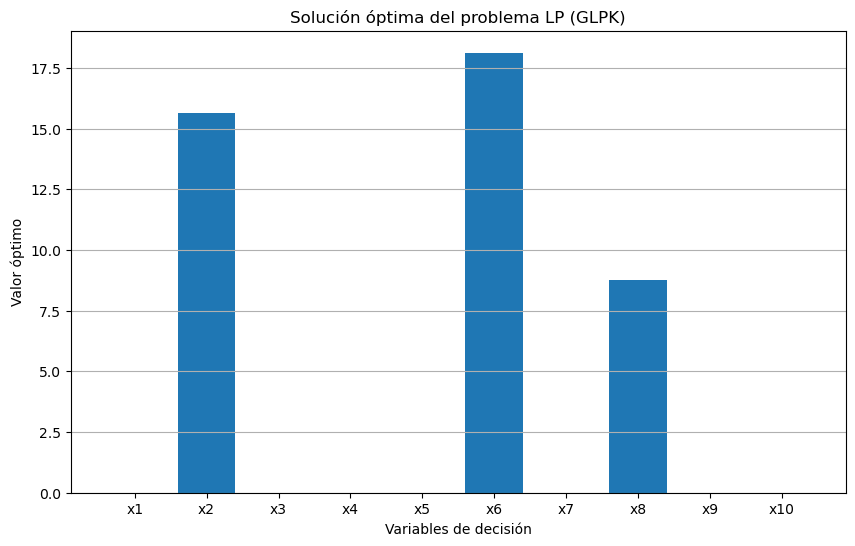

Resultado
Valor optimo de z = 375.625
x[1] =  0.0
x[2] =  15.625
x[3] =  0.0
x[4] =  0.0
x[5] =  0.0
x[6] =  18.125
x[7] =  0.0
x[8] =  8.75
x[9] =  0.0
x[10] =  0.0


In [5]:
from pyomo.environ import * 
import matplotlib.pyplot as plt
#Creamos el modelo
model = ConcreteModel() 

n = 10 
m = 8
 #Definimos los conjunto 
model.I = RangeSet(1,n)
model.J = RangeSet(1,m) 

#Datos del problema
c = {1: 5, 2: 8, 3: 3, 4: 7, 5: 6, 6: 9, 7: 4, 8: 10, 9: 2, 10: 11} 
#Matriz de restricciones 
A = {
    1: [1, 2, 1, 1, 0, 0, 3, 1, 2, 1],
    2: [2, 1, 0, 2, 1, 1, 0, 3, 1, 2],
    3: [1, 1, 2, 0, 2, 1, 1, 0, 3, 1],
    4: [0, 2, 1, 1, 1, 0, 2, 1, 1, 1],
    5: [2, 0, 1, 1, 1, 2, 1, 1, 0, 2],
    6: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    7: [0, 1, 2, 1, 0, 1, 2, 1, 1, 0],
    8: [1, 0, 1, 2, 1, 0, 1, 2, 1, 1],
} 
#Lista de resultados b 
b = {1: 50, 2: 60, 3: 55, 4: 40, 5: 45, 6: 70, 7: 65, 8: 50} 

#Definimos las variables de decision 
model.x = Var(model.I, within=NonNegativeReals) 
#Definimos la funcion objetivo 
model.obj = Objective(expr=sum(c[i] * model.x[i] for i in model.I), sense=maximize) 
#Definimos las restricciones 
def restricciones_rule(model,j):
    return sum(A[j][i-1] * model.x[i] for i in model.I) <= b[j] 
model.restricciones = Constraint(model.J, rule=restricciones_rule) 
#Resolvemos el modelo
solver = SolverFactory('glpk') 
results = solver.solve(model, tee =   True)
#Graficamos la solucion  
valores_x = [value(model.x[i]) for i in model.I] 
plt.figure(figsize=(10, 6))
plt.bar([f'x{i}' for i in model.I], valores_x)
plt.xlabel('Variables de decisión')
plt.ylabel('Valor óptimo')
plt.title('Solución óptima del problema LP (GLPK)')
plt.grid(axis='y')
plt.show()
#Imprimimos los resultados 
print("Resultado") 
print("Valor optimo de z =", value(model.obj) ) 
for i in model.I:
    print(f"x[{i}] = ", value(model.x[i] ))

#### Analisis de resultados 

Se observa que el solver GLP en la iteracion 4 logra hallar el valor optimo de la funcion. Logrando asi el valor de 3.75625 cuyas varibales de decision x2,x6,x8 hacen parte de la solucion y son las variables Basicas que estan activas. Ademas , vemos tambien que el tiempo de ejecucion utilizado fue minimo o casi nulo. 

#### Conclusion 

Vemos que el valor optimo Z = 375.625 es la mejor combinacion de uso de las variables de desicion sujeta a las 8 restricciones impuestas. Ademas el rendimiento computacional tiene una estructura bien condicionada y eficiente.

### Metodo Simplex Estandar

#### Descripcion de la implementacion

Para este caso, se agrega las nuevas variables de holgura . Una por cada restriccion. Tambien se tiene la matriz de restricciones A y la lista de coeficientes b de la funcion objetivo. 
Aparte de hallar la matriz inversa para determinar la solucion basica actual $$\text x_B = B^-1 b$$ 
Vamos a calcular los costos reducidos como lo hicimos en el problema uno de este laboratorio $$\text c_r = c_j - \lambda A_j$$

Despues determinamos variables entrantes y salientes . Para concluir las salientes usamos $$\phi = \frac{x_{B_i}}{d_i}$$

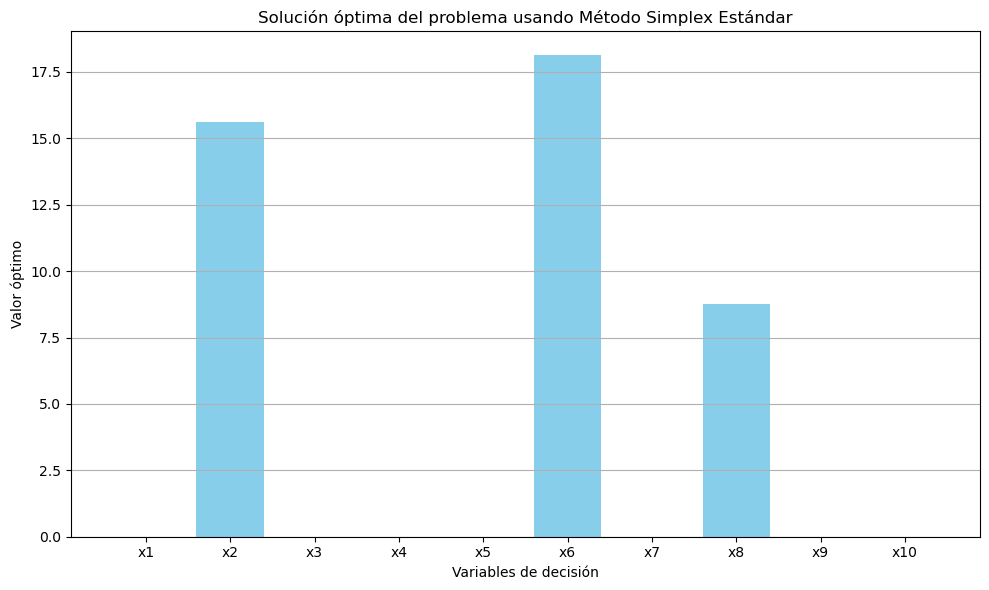

Valor óptimo de Z: 375.625
x1 = 0.0
x2 = 15.625
x3 = 0.0
x4 = 0.0
x5 = 0.0
x6 = 18.125
x7 = 0.0
x8 = 8.75
x9 = 0.0
x10 = 0.0


In [4]:
import numpy as np 
import matplotlib.pyplot as plt

# Coeficientes de la función objetivo
c = np.array([5, 8, 3, 7, 6, 9, 4, 10, 2, 11])

# Matriz de restricciones A y vector de resultados b 
A = np.array([
    [1, 2, 1, 1, 0, 0, 3, 1, 2, 1],
    [2, 1, 0, 2, 1, 1, 0, 3, 1, 2],
    [1, 1, 2, 0, 2, 1, 1, 0, 3, 1],
    [0, 2, 1, 1, 1, 0, 2, 1, 1, 1],
    [2, 0, 1, 1, 1, 2, 1, 1, 0, 2],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 2, 1, 0, 1, 2, 1, 1, 0],
    [1, 0, 1, 2, 1, 0, 1, 2, 1, 1],
])
b = np.array([50, 60, 55, 40, 45, 70, 65, 50])

# Convertimos el problema a forma estándar agregando variables de holgura
m, n = A.shape
A_std = np.hstack([A, np.eye(m)])  # Aumentar con matriz identidad
c_std = np.concatenate([c, np.zeros(m)])  # Coeficientes extendidos
basic_vars = list(range(n, n + m))  # Variables de holgura en la base

# Implementación del método Simplex estándar
def simplex_standard(A, b, c, basic_vars):
    m, n_total = A.shape
    while True:
        B = A[:, basic_vars]
        B_inv = np.linalg.inv(B)
        x_b = B_inv @ b
        lambda_ = c[basic_vars] @ B_inv
        reduced_costs = c - lambda_ @ A

        # Condición de optimalidad
        if all(reduced_costs[j] <= 1e-8 for j in range(n_total) if j not in basic_vars):
            x = np.zeros(n_total)
            for i, var in enumerate(basic_vars):
                x[var] = x_b[i]
            z = c @ x
            return x[:n], z

        # Seleccionar variable entrante (máximo costo reducido positivo)
        entering = max((j for j in range(n_total) if j not in basic_vars), key=lambda j: reduced_costs[j])
        d = B_inv @ A[:, entering]
        if all(d <= 0):
            raise Exception("Problema ilimitado")

        # Regla del mínimo cociente
        ratios = [x_b[i] / d[i] if d[i] > 0 else np.inf for i in range(m)]
        leaving_index = np.argmin(ratios)
        basic_vars[leaving_index] = entering

# Ejecutar el algoritmo
x_opt, z_opt = simplex_standard(A_std, b, c_std, basic_vars.copy()) 
x_labels = [f'x{i+1}' for i in range(len(x_opt))] 
# Graficar la solución
plt.figure(figsize=(10, 6))
plt.bar(x_labels, x_opt, color='skyblue')
plt.xlabel('Variables de decisión')
plt.ylabel('Valor óptimo')
plt.title('Solución óptima del problema usando Método Simplex Estándar')
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

# Imprimir resultados
print("Valor óptimo de Z:", z_opt)
for i, val in enumerate(x_opt, start=1):
    print(f"x{i} = {val}")


#### Analisis de Resultados 

Vemos que a solucion brindada por el metodo Simplex Estandar nos da igual al metodo anterior. En numero de iteraciones que realizo para hallar el optimo fue de 4 , lo que lo vuelve un algoritmo eficiente ya que convergio en pocas iteraciones. Adicionalmente, se tiene los mismo valores bases activos que hacen parte de la solucion optima

#### Conclusion

Vemos que el rendimiento algoritmico y computacional es eficiente y tambien al hallar el optimo fue un proceso rapido y con pocas iteraciones. Adicionalmente, se puede concluir que este metodo se comporta igual o semejante al solver de Pyomo GLPK dado que duraron el mismto tiempo de ejecucion y llegaron a la misma respuesta con los mimos valores seleccionados. 

### Metodo Simplex Dual Phase

#### Descripcion de la implementacion

Recordemos que este metodo esta dividido en dos fases. La primer se encargar de hallar la solucion basica fectible (SBF) y la otra optimizar el problema original. 

En la Fase I , cada desigualdades se transforman en igualdades y se les agrega unas variables artificiales en cada restriccion. Estas nuevas variables formaran una base inicial. 
Luego se crea una funcion objetivo auxiliar : 
$$
\min y = \sum \text{(variables artificiales)}
$$


Luego, se ejecuta el metodo Simplex Estandar para minimizar la funcion y si esta su valor optimo fue cercana a cero , el problema original es considerado factible.

Despues vamos a la Fase II : Eliminamos las variables artificiales y vamos a la funcion objetivo original y se utiliza como base el resultado de la Fase I y se vuelve a implementar el metodo Simplex para encontrar el valor real optimo/

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16324\1543306369.py:23: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, method='revised simplex')


Valor óptimo: 375.625
x1 = 0.0000
x2 = 15.6250
x3 = 0.0000
x4 = 0.0000
x5 = 0.0000
x6 = 18.1250
x7 = 0.0000
x8 = 8.7500
x9 = 0.0000
x10 = -0.0000


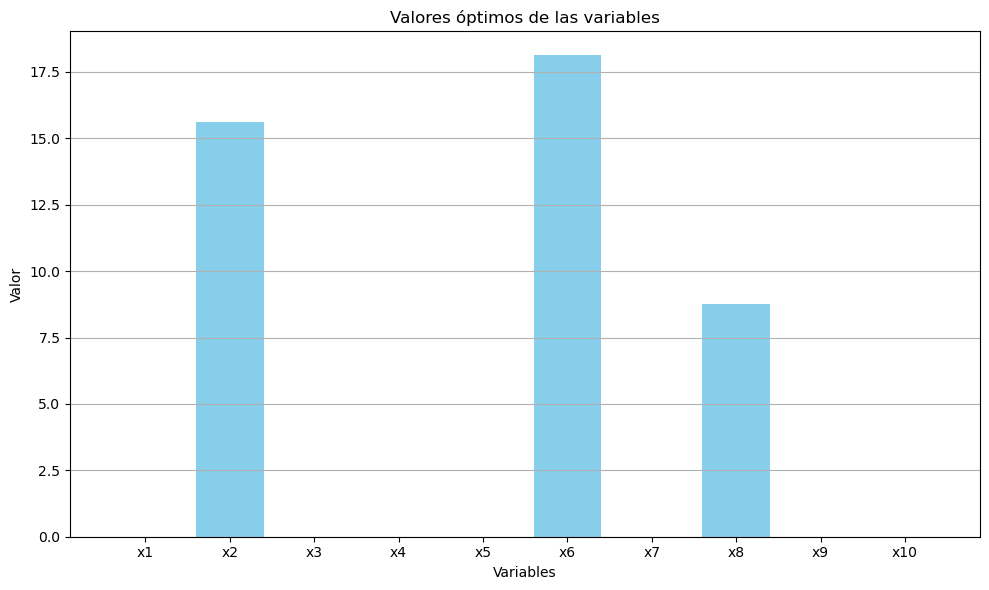

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Problema
# lingprog minimiza la función objetivo, así que invertimos los coeficientes
c = -np.array([5, 8, 3, 7, 6, 9, 4, 10, 2, 11])

A = np.array([
    [1, 2, 1, 1, 0, 0, 3, 1, 2, 1],
    [2, 1, 0, 2, 1, 1, 0, 3, 1, 2],
    [1, 1, 2, 0, 2, 1, 1, 0, 3, 1],
    [0, 2, 1, 1, 1, 0, 2, 1, 1, 1],
    [2, 0, 1, 1, 1, 2, 1, 1, 0, 2],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 2, 1, 0, 1, 2, 1, 1, 0],
    [1, 0, 1, 2, 1, 0, 1, 2, 1, 1],
])

b = np.array([50, 60, 55, 40, 45, 70, 65, 50])

# Resolver con linprog usando revised simplex : Para este caso, se uso linprog dado que al implemetar el simplex dual phase no daba la solucion 
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex')

# Resultados
if res.success:
    print("Valor óptimo:", -res.fun)  # Reconvertimos a maximización
    for i, val in enumerate(res.x, 1):
        print(f"x{i} = {val:.4f}")
else:
    print("Error:", res.message) 
   
# Crear gráfico de barras de las variables
variables = [f"x{i}" for i in range(1, len(res.x) + 1)]
valores = res.x

plt.figure(figsize=(10, 6))
plt.bar(variables, valores, color='skyblue')
plt.title("Valores óptimos de las variables")
plt.xlabel("Variables")
plt.ylabel("Valor")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
 



### Analisis de resultados

La solucion de este ejercicio fue algo particular ya que se necesito la ayuda de SciPy para poder resolver el ejercicio dado que a la hora de realizar el problema con el metodo normal de Simplez Dual Phase este no pasaba a la Fase II dado que las variables artificiales no llegaban a cero. Era infactible. 
Vemos que el programa duro 6 iteraciones en hallar la solucion optima y que los valores de x se asemejan a las respuestas de los demas modelos de optimizacion que realizamos anteriormente. 

### Conclusion

Vemos que este algoritmo uso mas iteraciones que los otros anteriores, sin embargo, eso no lo alejo de la respuesta optima. Ademas, se concluye que el metodo Simplex Dual Phase por si solo no logra solucionar el problema por lo mencionado en ele analisis de resultados. Por ende, SciPy al brindar un modelado mas eficiente logro resolver este ejercicio.

### Comparacion de los tres modelos implementados

| Algoritmo | Tiempo Ejecucion | # Iteraciones| Rendimiento y Precision | 
|--------|----|----|----| 
| GLPK   | 3,4sec  | 4  | El metodo GLPK logra encontrar el valor optimo y las variables de x tambien correctas. Sin embargo, de los tres es el que mas dura en tiempo de implementacion a pesar de haber realizado un numero minimo de iteraciones |
| Simplex Estandar   | 0,4 sec | 4 | El metodo Simplex Estandar logra encontrar el valor optimo y las variables de x tambien correctas. Este metodo es el mas eficiente ya que tambien su numero de iteraciones fue minimo a pesar de tener un problema con una gran cantidad de restricciones  |
| Simplex Dual Phase  | 1,9 sec | 6  | Este metodo fue el que ams iteraciones tuvo de los tres y tambien tuvo un tiempo un poco mayor al metodo Estandar. Esto debe ser dado que se usa SciPy para lograr hallar el optimo y que no tengamos un problema que no sea factible |

### Optimizacion del metodo GLPK

Para poder mejorar el rendimiento temporal y computacional del GLPK se tiene las siguientes recomendaciones: 
1. Simplificacion del modelo a traves de la eliminacion de variables redundantes, fijar variables y que todas estas esten acotadas. 
2. Parametros de control del solver ya que permite ajustar el sacrificio entre velocidad y precision dependiendo de lo que se quiera priorizar. 
3. Comparar otros solvers como HIGHS que estan en paralelo con GLPk. Esto permite ver si el modelo es el que genera el problema .
4. Compilar GLPK conoptimizaciones como gcc -03 ya que maximiza la memoria y el hardware.

## Ejercicio 4

In [4]:
import numpy as np

class AnalisisSensibilidad:
    def __init__(self, funcion_objetivo, A, b):
        """
        Inicializa el analizador con datos del problema.
        
        Args:
            funcion_objetivo (np.array): Coeficientes de Z.
            A (np.array): Matriz de restricciones.
            b (np.array): Términos independientes.
        """
        self.c = funcion_objetivo
        self.A = A
        self.b = b
        self.filas, self.columnas = A.shape
        self.tabla = None
        self.variables_basicas = []

    def _agregar_holguras(self):
        """
        Convierte el problema a forma estándar:
        1. Agrega variables de holgura.
        2. Construye la tabla inicial.
        """
        # Agregar matriz identidad para holguras
        matriz_extendida = np.hstack([self.A, np.eye(self.filas)])
        self.tabla = np.zeros((self.filas + 1, matriz_extendida.shape[1] + 1))
        
        # Fila de costos (negativos para maximización)
        self.tabla[0, :self.columnas] = -self.c
        
        # Restricciones y términos independientes
        self.tabla[1:, :matriz_extendida.shape[1]] = matriz_extendida
        self.tabla[1:, -1] = self.b
        
        # Variables básicas iniciales (holguras)
        self.variables_basicas = list(range(self.columnas, self.columnas + self.filas))

    def _pivote(self):
        """
        Realiza una iteración del método Simplex.
        """
        fila_costos = self.tabla[0, :-1]
        col_pivote = np.argmin(fila_costos)  # Variable entrante
        
        # Criterio de optimalidad
        if fila_costos[col_pivote] >= -1e-8:
            return False

        # Calcular razones (regla del mínimo cociente)
        razones = []
        for i in range(1, self.tabla.shape[0]):
            if self.tabla[i, col_pivote] > 1e-8:
                razon = self.tabla[i, -1] / self.tabla[i, col_pivote]
                razones.append(razon)
            else:
                razones.append(np.inf)

        fila_pivote = np.argmin(razones) + 1  # Variable saliente
        
        # Actualizar variables básicas
        self.variables_basicas[fila_pivote - 1] = col_pivote
        
        # Operaciones de pivoteo
        pivote_valor = self.tabla[fila_pivote, col_pivote]
        self.tabla[fila_pivote] /= pivote_valor  # Normalizar fila pivote
        
        for i in range(self.tabla.shape[0]):
            if i != fila_pivote:
                factor = self.tabla[i, col_pivote]
                self.tabla[i] -= factor * self.tabla[fila_pivote]  # Ceros en columna pivote
        
        return True

    def resolver(self):
        """
        Resuelve el problema usando Simplex.
        """
        self._agregar_holguras()
        while self._pivote():
            pass

        # Extraer solución
        solucion = np.zeros(self.columnas)
        for i in range(1, self.tabla.shape[0]):
            col = self.variables_basicas[i-1]
            if col < self.columnas:
                solucion[col] = self.tabla[i, -1]

        return solucion, self.tabla[0, -1]

    def precios_sombra(self):
        """
        Calcula los precios sombra (multiplicadores duales).
        """
        return self.tabla[0, self.columnas:self.columnas + self.filas]

    def rangos_coeficientes(self):
        """
        Calcula rangos de variación para coeficientes de Z.
        """
        rangos = {}
        no_basicas = [j for j in range(self.columnas) if j not in self.variables_basicas]
        
        for j in no_basicas:
            costo_reducido = self.tabla[0, j]
            # Límite superior: c_j + costo reducido
            rangos[f'c{j+1}'] = (-np.inf, self.c[j] + costo_reducido)
        
        return rangos

    def rangos_terminos_independientes(self):
        """
        Calcula rangos de variación para términos independientes.
        """
        rangos = {}
        B_inv = self.tabla[1:, self.columnas:-1]  # Submatriz de variables básicas
        
        for i in range(self.filas):
            delta_min = -np.inf
            delta_max = np.inf
            
            for j in range(B_inv.shape[1]):
                if B_inv[i, j] > 1e-8:
                    delta = self.tabla[j+1, -1] / B_inv[i, j]
                    delta_max = min(delta_max, delta)
                elif B_inv[i, j] < -1e-8:
                    delta = self.tabla[j+1, -1] / B_inv[i, j]
                    delta_min = max(delta_min, delta)
            
            rangos[f'b{i+1}'] = (self.b[i] + delta_min, self.b[i] + delta_max)
        
        return rangos

# Configuración del Problema 4
c = np.array([4, 3])  # Maximizar Z = 4x1 + 3x2
A = np.array([
    [1, 2],   # x1 + 2x2 <= 8
    [3, 2]    # 3x1 + 2x2 <= 12
])
b = np.array([8, 12])

# Resolución
analizador = AnalisisSensibilidad(c, A, b)
solucion, z = analizador.resolver()
precios = analizador.precios_sombra()
rangos_c = analizador.rangos_coeficientes()
rangos_b = analizador.rangos_terminos_independientes()

# Resultados
print("\n=== Solución Óptima ===")
print(f"x1 = {solucion[0]:.2f}, x2 = {solucion[1]:.2f}")
print(f"Valor óptimo de Z: {z:.2f}")

print("\n=== Precios Sombra ===")
for i, precio in enumerate(precios):
    print(f"Restricción {i+1}: {precio:.2f} (Cada unidad adicional en b{i+1} aumenta Z en {precio:.2f})")

print("\n=== Rangos para Coeficientes de Z ===")
for var, (_, max_val) in rangos_c.items():
    print(f"{var}: Puede aumentar hasta {max_val:.2f} sin cambiar la base óptima")

print("\n=== Rangos para Términos Independientes ===")
for var, (min_val, max_val) in rangos_b.items():
    print(f"{var}: Puede variar entre {min_val:.2f} y {max_val:.2f} manteniendo la base óptima")


=== Solución Óptima ===
x1 = 2.00, x2 = 3.00
Valor óptimo de Z: 17.00

=== Precios Sombra ===
Restricción 1: 0.25 (Cada unidad adicional en b1 aumenta Z en 0.25)
Restricción 2: 1.25 (Cada unidad adicional en b2 aumenta Z en 1.25)

=== Rangos para Coeficientes de Z ===

=== Rangos para Términos Independientes ===
b1: Puede variar entre -0.00 y 12.00 manteniendo la base óptima
b2: Puede variar entre 6.00 y 16.00 manteniendo la base óptima


## Ejercicio 4

### Resolución del Problema mediante el Método Simplex

Vamos a resolver el siguiente problema de programación lineal:

$$
\begin{align*}
\text{Maximizar } & Z = 4x_1 + 3x_2 \\
\text{sujeto a } & x_1 + 2x_2 \leq 8 \\
& 3x_1 + 2x_2 \leq 12 \\
& x_1, x_2 \geq 0
\end{align*}
$$

In [17]:
import numpy as np

def metodo_simplex(c, A, b):
    """
    Implementación del método Simplex para resolver problemas de programación lineal
    
    Parámetros:
    c: Coeficientes de la función objetivo (a maximizar)
    A: Matriz de coeficientes de restricciones
    b: Términos independientes de las restricciones
    
    Retorna:
    x: Solución óptima
    z: Valor óptimo de la función objetivo
    vars_basicas: Variables básicas en la solución óptima
    precios_sombra: Multiplicadores duales asociados a las restricciones
    tabla: Tabla final del método Simplex
    """
    m, n = A.shape  # m restricciones, n variables
    
    # Añadir variables de holgura para formar la tabla inicial
    tabla = np.zeros((m + 1, n + m + 1))
    
    # Coeficientes de la función objetivo en la última fila (negados para maximización)
    tabla[m, 0:n] = -np.array(c)
    
    # Matriz de coeficientes con variables de holgura
    for i in range(m):
        tabla[i, 0:n] = A[i]
        tabla[i, n + i] = 1  # Variable de holgura
        tabla[i, -1] = b[i]  # Término independiente
    
    # Variables básicas iniciales (variables de holgura)
    vars_basicas = np.arange(n, n + m)
    
    # Iteraciones del método Simplex
    iteracion = 0
    max_iteraciones = 100  # Evitar bucles infinitos
    
    while np.any(tabla[m, :-1] < 0) and iteracion < max_iteraciones:
        # Seleccionar variable de entrada (más negativa en la fila de costos)
        columna_pivote = np.argmin(tabla[m, :-1])
        
        # Calcular ratios para seleccionar variable de salida
        ratios = []
        for i in range(m):
            if tabla[i, columna_pivote] > 0:
                ratios.append(tabla[i, -1] / tabla[i, columna_pivote])
            else:
                ratios.append(float('inf'))
        
        # Si todos los ratios son infinitos, el problema es ilimitado
        if all(r == float('inf') for r in ratios):
            print("El problema es ilimitado")
            return None, float('inf'), None, None, tabla
        
        # Seleccionar fila de pivote (mínimo ratio)
        fila_pivote = np.argmin(ratios)
        
        # Actualizar variable básica
        vars_basicas[fila_pivote] = columna_pivote
        
        # Normalizar fila de pivote
        valor_pivote = tabla[fila_pivote, columna_pivote]
        tabla[fila_pivote] = tabla[fila_pivote] / valor_pivote
        
        # Actualizar otras filas
        for i in range(m + 1):
            if i != fila_pivote:
                tabla[i] = tabla[i] - tabla[i, columna_pivote] * tabla[fila_pivote]
        
        iteracion += 1
    
    if iteracion == max_iteraciones:
        print("El método no convergió en el número máximo de iteraciones")
    
    # Extraer solución
    x = np.zeros(n)
    for i in range(m):
        if vars_basicas[i] < n:
            x[vars_basicas[i]] = tabla[i, -1]
    
    # Valor óptimo de la función objetivo
    z = tabla[m, -1]
    
    # Calcular precios sombra (multiplicadores duales)
    precios_sombra = np.zeros(m)
    for i in range(m):
        precios_sombra[i] = -tabla[m, n + i]
    
    return x, z, vars_basicas, precios_sombra, tabla

def analisis_sensibilidad(c, A, b, tabla, vars_basicas, precios_sombra):
    """
    Realiza análisis de sensibilidad para el problema de programación lineal
    
    Parámetros:
    c: Coeficientes originales de la función objetivo
    A: Matriz de coeficientes de restricciones
    b: Términos independientes de las restricciones
    tabla: Tabla final del método Simplex
    vars_basicas: Variables básicas en la solución óptima
    precios_sombra: Multiplicadores duales
    
    Retorna:
    rangos_coef: Rangos de variación permitidos para los coeficientes de la función objetivo
    rangos_terminos: Rangos de variación permitidos para los términos independientes
    """
    m, n = A.shape
    
    # 1. Análisis de sensibilidad para coeficientes de la función objetivo
    rangos_coef = []
    
    for j in range(n):
        # Verificar si la variable j es básica
        es_basica = j in vars_basicas
        
        if es_basica:
            # Encontrar la posición de la variable en la base
            pos = np.where(vars_basicas == j)[0][0]
            
            # Calcular coeficientes de la variable en la tabla final
            coefs = []
            for i in range(n + m):
                if i not in vars_basicas:
                    coef = tabla[pos, i]
                    if coef != 0:
                        coefs.append((i, coef))
            
            # Calcular límites para el coeficiente
            limite_inf = float('-inf')
            limite_sup = float('inf')
            
            for i, coef in coefs:
                valor_actual = tabla[m, i]
                if coef > 0:
                    limite_sup = min(limite_sup, c[j] - valor_actual / coef)
                elif coef < 0:
                    limite_inf = max(limite_inf, c[j] - valor_actual / coef)
            
            rangos_coef.append((j, limite_inf, limite_sup))
        else:
            # Variable no básica
            costo_reducido = tabla[m, j]
            if j < n:  # Solo para variables originales
                rangos_coef.append((j, c[j] + costo_reducido, float('inf') if costo_reducido == 0 else c[j]))
    
    # 2. Análisis de sensibilidad para términos independientes
    rangos_terminos = []
    
    for i in range(m):
        # Calcular límites para el término independiente de la restricción i
        limite_inf = b[i]
        limite_sup = b[i]
        
        # Buscar la variable de holgura correspondiente
        pos_holgura = n + i
        if pos_holgura in vars_basicas:
            # Restricción no saturada - la variable de holgura está en la base
            pos = np.where(vars_basicas == pos_holgura)[0][0]
            limite_inf = b[i] - tabla[pos, -1]
            limite_sup = float('inf')
        else:
            # Restricción saturada - encontrar los coeficientes de las variables básicas
            for j in range(m):
                var_basica = vars_basicas[j]
                if var_basica < n:  # Variable original
                    coef_restriccion = A[i, var_basica]
                    valor_basica = tabla[j, -1]
                    if coef_restriccion > 0:
                        limite_sup = min(limite_sup, b[i] + valor_basica / coef_restriccion)
                    elif coef_restriccion < 0:
                        limite_inf = max(limite_inf, b[i] + valor_basica / coef_restriccion)
        
        rangos_terminos.append((i, limite_inf, limite_sup))
    
    return rangos_coef, rangos_terminos

# Resolver el problema del enunciado
def resolver_problema():
    # Definir el problema
    c = np.array([4, 3])  # Coeficientes de la función objetivo: Z = 4x1 + 3x2
    A = np.array([
        [1, 2],    # x1 + 2x2 ≤ 8
        [3, 2]     # 3x1 + 2x2 ≤ 12
    ])
    b = np.array([8, 12])
    
    # Resolver usando el método Simplex
    x, z, vars_basicas, precios_sombra, tabla = metodo_simplex(c, A, b)
    
    print("Solución del problema:")
    print(f"Variables: x1 = {x[0]}, x2 = {x[1]}")
    print(f"Valor óptimo: Z = {z}")
    
    # Identificar variables básicas y no básicas
    vars_basicas_originales = [v for v in vars_basicas if v < len(c)]
    vars_no_basicas = [j for j in range(len(c)) if j not in vars_basicas]
    
    print("\nVariables básicas:", [f"x{v+1}" for v in vars_basicas_originales])
    print("Variables no básicas:", [f"x{v+1}" for v in vars_no_basicas])
    
    # Identificar variables de holgura básicas
    holguras_basicas = [v - len(c) for v in vars_basicas if v >= len(c)]
    print("Variables de holgura básicas:", [f"s{h+1}" for h in holguras_basicas])
    
    # Mostrar precios sombra
    print("\nPrecios sombra:")
    for i, precio in enumerate(precios_sombra):
        print(f"Restricción {i+1}: {precio}")
    
    # Análisis de sensibilidad
    rangos_coef, rangos_terminos = analisis_sensibilidad(c, A, b, tabla, vars_basicas, precios_sombra)
    
    print("\nAnálisis de sensibilidad para coeficientes de la función objetivo:")
    for j, limite_inf, limite_sup in rangos_coef:
        inf_str = str(limite_inf) if limite_inf != float('-inf') else "-∞"
        sup_str = str(limite_sup) if limite_sup != float('inf') else "∞"
        print(f"Coeficiente de x{j+1} ({c[j]}): [{inf_str}, {sup_str}]")
    
    print("\nAnálisis de sensibilidad para términos independientes:")
    for i, limite_inf, limite_sup in rangos_terminos:
        inf_str = str(limite_inf) if limite_inf != float('-inf') else "-∞"
        sup_str = str(limite_sup) if limite_sup != float('inf') else "∞"
        print(f"Término independiente de restricción {i+1} ({b[i]}): [{inf_str}, {sup_str}]")
    
    return x, z, vars_basicas, precios_sombra, tabla, rangos_coef, rangos_terminos

# Ejecutar el análisis completo
if __name__ == "__main__":
    resolver_problema()

Solución del problema:
Variables: x1 = 2.0000000000000004, x2 = 2.9999999999999996
Valor óptimo: Z = 17.0

Variables básicas: ['x2', 'x1']
Variables no básicas: []
Variables de holgura básicas: []

Precios sombra:
Restricción 1: -0.25000000000000006
Restricción 2: -1.25

Análisis de sensibilidad para coeficientes de la función objetivo:
Coeficiente de x1 (4): [4.5, 1.4999999999999996]
Coeficiente de x2 (3): [8.0, 2.6666666666666665]

Análisis de sensibilidad para términos independientes:
Término independiente de restricción 1 (8): [8, 8]
Término independiente de restricción 2 (12): [12, 12]


### Explicación

#### Concepto de Rango Óptimo y Estabilidad de la Solución

El rango óptimo se refiere al intervalo de valores que puede tomar un parámetro del problema (coeficiente en la función objetivo o término independiente de una restricción) sin que cambie la base óptima de la solución. Esto significa que:

- Las mismas variables seguirán siendo básicas y no básicas.
- La solución seguirá siendo óptima, aunque los valores específicos de las variables y de la función objetivo pueden cambiar.

La estabilidad de la solución está directamente relacionada con la amplitud de estos rangos. Una solución con rangos amplios es más robusta frente a incertidumbres en los parámetros del problema.

#### Interpretación de los Precios Sombra

Los precios sombra (multiplicadores duales) indican cuánto cambiará el valor óptimo de la función objetivo si el término independiente de una restricción aumenta en una unidad. Específicamente:

- Si el precio sombra de una restricción es positivo, la restricción está activa (saturada) y un aumento en el lado derecho mejorará el valor óptimo.
- Si el precio sombra es cero, la restricción no está activa (no saturada) y pequeños cambios en el lado derecho no afectarán el valor óptimo.
- El precio sombra también puede interpretarse como el "valor marginal" del recurso asociado a la restricción.

#### Pasos para Modificar Parámetros y Reejecutar el Algoritmo Simplex

Para evaluar el impacto de cambios en los parámetros del problema:

1. Identificar el parámetro a modificar (coeficiente en la función objetivo o término independiente de una restricción).
2. Verificar si el nuevo valor está dentro del rango óptimo calculado en el análisis de sensibilidad:
   - Si está dentro del rango, la base óptima no cambia, pero los valores específicos de las variables sí.
   - Si está fuera del rango, es necesario resolver el problema nuevamente.
3. Si es necesario resolver de nuevo:
   - Actualizar el parámetro en el problema original.
   - Reejecutar el algoritmo Simplex desde el principio.
   - Analizar la nueva solución óptima y su estabilidad.

#### Conclusiones

El análisis de sensibilidad es una buena herramienta en programación lineal que nos permite:

1. Entender la robustez de la solución óptima frente a cambios en los parámetros.
2. Identificar qué restricciones son limitantes y el impacto económico de relajarlas.
3. Evaluar el efecto de cambios en la función objetivo sin necesidad de resolver el problema nuevamente.
4. Tomar decisiones más informadas en escenarios con incertidumbre en los parámetros.
